* (a) [$\alpha_i$'s](#Fit-result)

* (b)

    * The approximate solution is `calc_time`

    * [Plot](#Plots-at-different-time)

In [1]:
include("common.jl")
using PSet1Common

In [2]:
function fit_y0(xs, ys)
    len = length(xs)
    if length(ys) != len
        throw(ArgumentError("xs and ys should have the same length"))
    end
    T = promote_type(eltype(xs), eltype(ys))
    A = Matrix{T}(len, 6)
    @inbounds for i in 1:len
        for j in 1:6
            A[i, j] = sin(j * xs[i])
        end
    end
    A'*A \ (A'*ys)
end

fit_y0 (generic function with 1 method)

In [3]:
function calc_time(t, c, a)
    xs = linspace(0, π, 10000)
    ys = Vector{Float64}(length(xs))
    @inbounds for i in 1:length(xs)
        y = 0.0
        for j in 1:length(a)
            y += a[j] * sin(j * xs[i]) * cos(j * c * t)
        end
        ys[i] = y
    end
    xs, ys
end

calc_time (generic function with 1 method)

In [4]:
xs = π / 50 * (1:49);

#### Fit result

In [5]:
fit1 = fit_y0(xs, Float64[1e-4 * x^8 * (π - x)^4 for x in xs])

6-element Array{Float64,1}:
  0.0239601  
 -0.0168534  
 -0.00196336 
  0.00729857 
 -0.0036028  
  0.000969637

In [6]:
xs0, ys0 = calc_time(0, 1, fit1)
xs1, ys1 = calc_time(π / 4, 1, fit1)
xs2, ys2 = calc_time(π / 2, 1, fit1)
xs3, ys3 = calc_time(3π / 4, 1, fit1)
xs4, ys4 = calc_time(π, 1, fit1);

#### Plots at different time

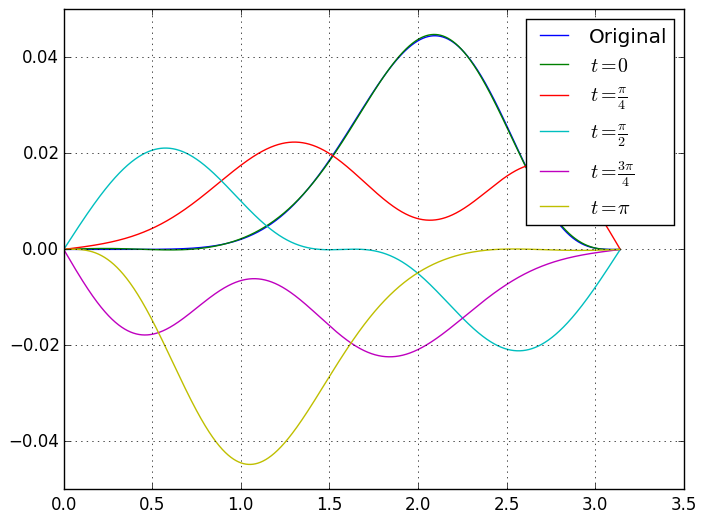

PyObject <matplotlib.legend.Legend object at 0x7fecb6e7dd30>

In [7]:
plot(xs0, Float64[1e-4 * x^8 * (π - x)^4 for x in xs0], label="Original")

plot(xs0, ys0, label="\$t=0\$")
plot(xs1, ys1, label="\$t=\\frac{\\pi}{4}\$")
plot(xs2, ys2, label="\$t=\\frac{\\pi}{2}\$")
plot(xs3, ys3, label="\$t=\\frac{3\\pi}{4}\$")
plot(xs4, ys4, label="\$t=\\pi\$")
grid()
legend()